In [1]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import  shapely
from shapely.geometry  import Point, Polygon,box,LineString
from scipy.spatial import Delaunay

from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
import numpy as np
import math
import pandas as pd
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


import shapely.geometry as geometry


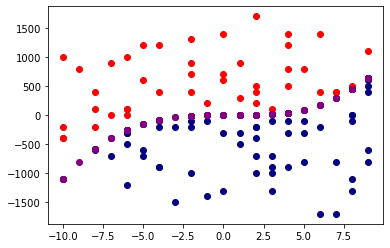

(70, 2) (70,)
(30, 2) (30,)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

path = "img_results/cubic/"
def prepareData(cat):
    fig = plt.figure()
    X = np.random.rand(100,2)
    #print(X)
    X = []
    randomnumber = np.random.randint(-100, -21)
    for x in range(100):
        X.append([np.random.randint(-10, 10),np.random.randint(-10, 10) - randint(-10, 10) ])
        
    #print(X)
    X = np.array(X)
    #print(X)
    #print(X.shape)
    if(cat == 'linear'): # done as quadratic 
        X[:,1]  = 0 + (X[:,1] * (100 - 0))
        y = X[:,0]**2 + 3*X[:,0] + 2 # y = 3x - 2 # change to this once done 
        print(X.shape) 
    elif(cat == 'quadratic'):
        X[:,1]  = 0 + (X[:,1] * (10 - 0))
        y = X[:,0]**2 + 3*X[:,0]  + 2 # y = x^2 + 3x + 2
    elif(cat == 'cubic'):
        X[:,1]  = 0 + (X[:,1] * (100 - 0))
        y = X[:,0]**3 - X[:,0]**2 - 5 # y = x^3 + 5
        
    else:
        X[:,1]  = 0 + (X[:,1] * (5 - 0))
        y = X[:,0]**4 + 2*X[:,0]**2 -0.3  # y = x^4 + 2x^2 - 0.25
    
    #print(X.shape)   
    data= []
    for i in range(len(X)):
        if( y[i] < X[i,1]): #3*X[i,0] - 6 / 4
            plt.scatter(X[i,0], X[i,1], c='r')
            data.append([X[i,0],X[i,1],0 ])
        else:
            #print("there")
            plt.scatter(X[i,0], X[i,1], c='navy')
            data.append([X[i,0],X[i,1],1 ])
    plt.scatter(X[:,0] , y, c='purple')
    plt.autoscale()  
    plt.savefig(path + '0001.png')
    plt.show()
    np_data = np.asarray(data, dtype=np.float32)  
    #print(np_data.shape)
        
    return np_data


data= prepareData("cubic")  
#print(data[:,:2])
#print(data[:,2])
X_train, X_test, y_train, y_test = \
        train_test_split(data[:,:2], data[:,2], test_size=.3, random_state=42)
print(X_train.shape,y_train.shape )
print(X_test.shape,y_test.shape )




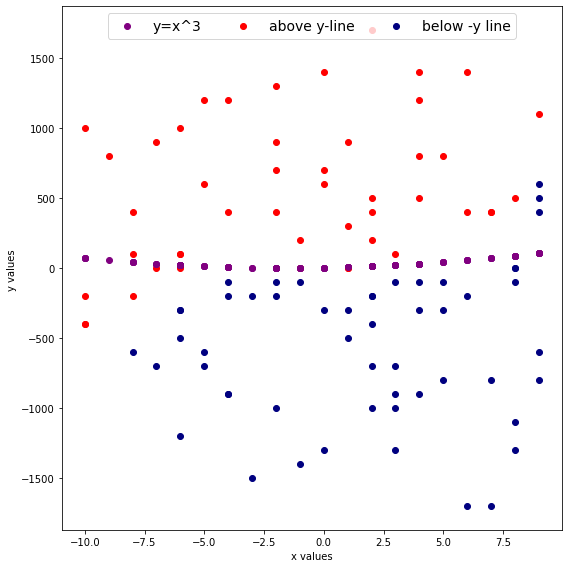

In [34]:
plt.figure(figsize=(8,8))
plt.xlabel('x values')
plt.ylabel('y values ')
path = "img_results/cubic/"

for d in data:
        if(d[2] == 0  ): #3*X[i,0] - 6 / 4
            l1 = plt.scatter(d[0], d[1], c='r', label='points above y-line')
        else:
            l2 = plt.scatter(d[0], d[1], c='navy', label='points below y-line') #print("there")
        l3 = plt.scatter(d[0] , d[0] **2 + 3*d[0]  + 2, c='purple', label='y = x^2 + 3x + 2')
        plt.autoscale()  
plt.tight_layout()
leg = plt.legend();
plt.legend((l3, l1,l2 ),
           ('y=x^3', 'above y-line', 'below -y line'),
           scatterpoints=1,
           loc='upper center',
           ncol=3,
           fontsize=14)

plt.savefig(path + '00.png')
plt.show()


In [35]:
print(type(X_train), type(X_test))
print(type(data))
#df.to_csv(index=False)

pd.DataFrame(X_train).to_csv("data/data1_cubic/X_train.csv", header=None)
pd.DataFrame(X_test).to_csv("data/data1_cubic/X_test.csv", header=None)
pd.DataFrame(y_train).to_csv("data/data1_cubic/y_train.csv", header=None)
pd.DataFrame(y_test).to_csv("data/data1_cubic/y_test.csv",header=None)
pd.DataFrame(data).to_csv("data/data1_cubic/data.csv",header=None)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
 def normalize(data,cols,target_col):
        print(data.columns)
        data_mod = data.drop(target_col, inplace=False, axis=1)
        print( data_mod.columns)
        x =   data_mod.values #returns a numpy array
       
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        norm_result = pd.DataFrame(x_scaled, columns = cols)
        print("Input head norm:", norm_result.head(5))
        result = pd.concat([norm_result, data[target_col]  ], axis=1)
        print("Result head norm:", result.head(5))
        return result

In [37]:
input_cols = ['feat_A','feat_B','target']
model_columns = ['feat_A','feat_B']
target_col = 'target'

data1= pd.DataFrame(data=np.c_[X_train,y_train] , columns= input_cols)
datainput = data1[input_cols]
#print(data1.shape)

input_data= normalize(datainput,model_columns, target_col )
class0 = input_data.loc[input_data[target_col]==0]
class1 = input_data.loc[input_data[target_col]==1]
#print (class1.head())
#print (class0.head())
points0 = class0[model_columns].to_numpy()
points1=class1[model_columns].to_numpy()

Index(['feat_A', 'feat_B', 'target'], dtype='object')
Index(['feat_A', 'feat_B'], dtype='object')
Input head norm:      feat_A    feat_B
0  0.315789  0.235294
1  0.736842  0.735294
2  0.315789  0.235294
3  0.736842  0.235294
4  0.000000  0.382353
Result head norm:      feat_A    feat_B  target
0  0.315789  0.235294     1.0
1  0.736842  0.735294     0.0
2  0.315789  0.235294     1.0
3  0.736842  0.235294     1.0
4  0.000000  0.382353     0.0


In [38]:
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    coords = np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    triangles = coords[tri.vertices]
    a = ((triangles[:,0,0] - triangles[:,1,0]) ** 2 + (triangles[:,0,1] - triangles[:,1,1]) ** 2) ** 0.5
    b = ((triangles[:,1,0] - triangles[:,2,0]) ** 2 + (triangles[:,1,1] - triangles[:,2,1]) ** 2) ** 0.5
    c = ((triangles[:,2,0] - triangles[:,0,0]) ** 2 + (triangles[:,2,1] - triangles[:,0,1]) ** 2) ** 0.5
    s = ( a + b + c ) / 2.0
    areas = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    circums = a * b * c / (4.0 * areas)
    filtered = triangles[circums < (1.0 / alpha)]
    edge1 = filtered[:,(0,1)]
    edge2 = filtered[:,(1,2)]
    edge3 = filtered[:,(2,0)]
    edge_points = np.unique(np.concatenate((edge1,edge2,edge3)), axis = 0).tolist()
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

In [39]:
def concave_hull(points,alpha):
    c = [Point(coord[0], coord[1]) for coord in points]
    concavehull, v = alpha_shape(c,alpha)
    convexhull = ConvexHull(points[:, [0, 1]])
    #print(hull)
    return concavehull, v, convexhull

def plotfinalAlpha(concavehull,convexhull,points,name ):
    fig, axs = plt.subplots(figsize=(6,6))   
    axs.set_title('Final Alpha Shape of '+ name)
    plt.plot(*concavehull.exterior.xy,c='royalblue', alpha=0.8)
    axs.fill(*concavehull.exterior.xy, alpha=0.5, fc='seagreen', ec='none')
    plt.scatter(points[:,0], points[:,1], c='royalblue')
    for simplex in convexhull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    plt.savefig(path + '02'+name+'.png')

In [40]:
from shapely.geometry import MultiPoint
from scipy.spatial import Voronoi
def plot_convexhull(hull):
    fig, axs = plt.subplots(figsize=(8,8)) 
    plt.xlabel('x values')
    plt.ylabel('y values-normalized ')
    axs.set_title('ConvexHull')
    for simplex in hull.simplices:
        plt.plot(combined_data[simplex, 0], combined_data[simplex, 1], 'k-')
    plt.tight_layout()
    plt.savefig(path + '01.png')
#plt.show()

def convextoPoly(point,hull):
    #fig, axs = plt.subplots() 
    listcn = list(zip(hull.points[hull.vertices,0], hull.points[hull.vertices,1]))
    poly = Polygon( [Point(coord[0], coord[1]) for coord in listcn])
    #axs.fill(*poly.exterior.coords.xy, alpha=0.4, fc='pink', ec='none')
    return poly

In [67]:
def polys_that_cut_both(multipoly, con0, con1):
    region_poly=[]
    
    for p in multipoly:
        if(p.intersects(con0) and p.intersects(con1)):
            region_poly.append(p)
    
    if(con0.intersection(con1).geom_type == 'MultiPolygon'):
        for inter in con0.intersection(con1):
            region_poly.append(inter)
    else:
         region_poly.append(con0.intersection(con1))        
    #for r in region_poly:
        #axs.plot(*r.exterior.coords.xy, alpha=0.9, color='black', lw=2)
        #axs.fill(*r.exterior.coords.xy, alpha=0.4, fc='blue', ec='none')
    return  cascaded_union(region_poly)
    

In [68]:
def plot_points(p0,p1):
    
    l1 = plt.scatter(p0[:,0], points0[:,1], c='crimson')
    l2 = plt.scatter(p1[:,0], points1[:,1], c='midnightblue')
    leg = plt.legend();
    plt.legend((l1,l2, ),
           ('Class 0 ', 'Class 1'),
           scatterpoints=1,
           loc='upper center',
           ncol=3,
           fontsize=14)
    
    

No handles with labels found to put in legend.


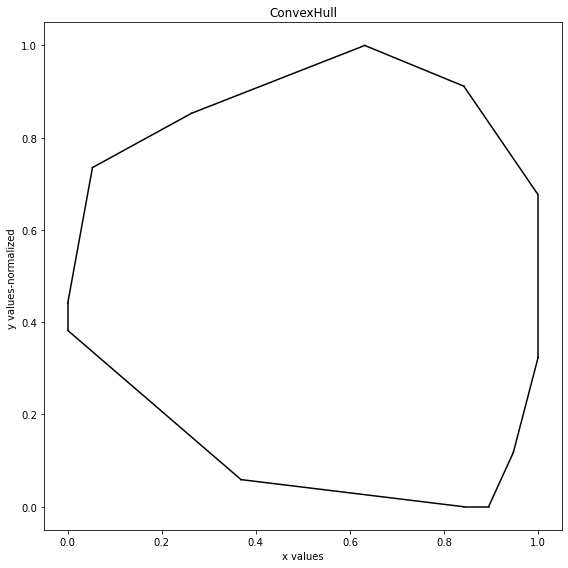

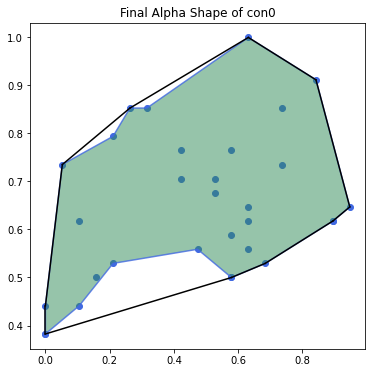

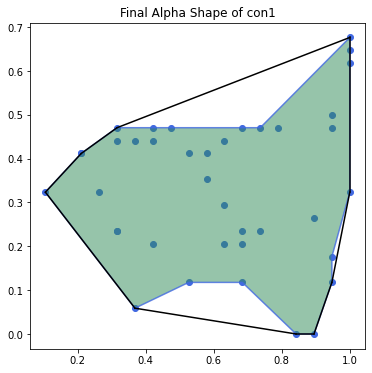

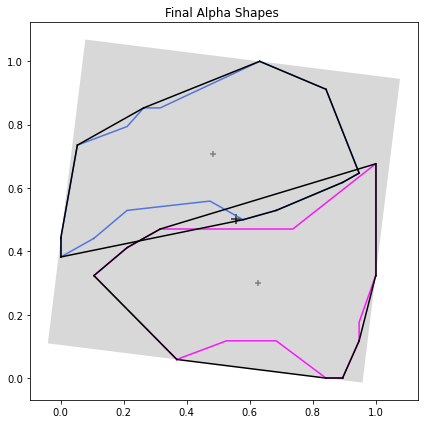

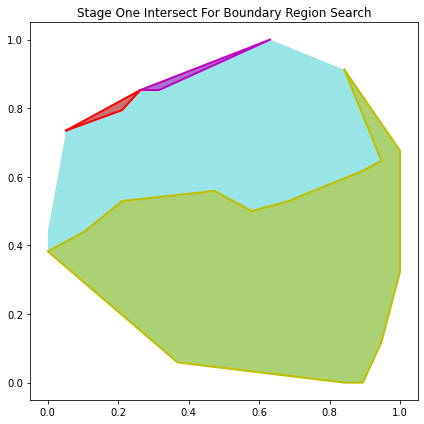

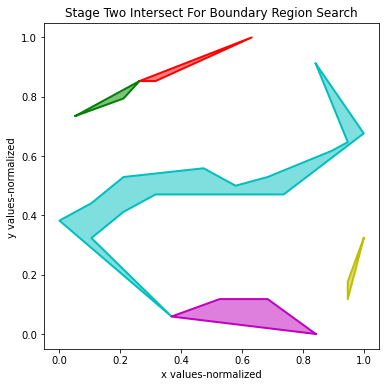

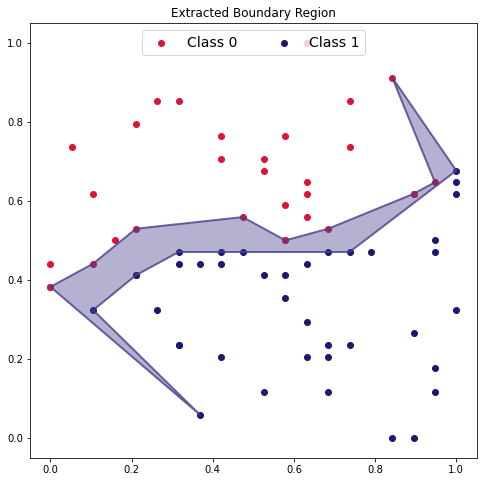

In [83]:
combined_data= np.concatenate((points1,points0), axis=0)
combinedhull = ConvexHull(combined_data[:, [0, 1]])
#First Plot
plot_convexhull(combinedhull)
combined_hull_poly = convextoPoly(combined_data, combinedhull)
#print("uuuuuuuuuuuuuuuu")

#Second and Third Plot (plot finals alphas only)
con0,v0, cnvx0 = concave_hull(points0,3.9)
con1,v1, cnvx1 = concave_hull(points1,3.9)
plotfinalAlpha(con0,cnvx0,points0,"con0" )
plotfinalAlpha(con1,cnvx1,points1,"con1" )



c0_flag=False
c1_flag= False
alpha =3
opt_alpha=[-1,-1]

if(con0.geom_type == 'MultiPolygon'):
            c0_flag=True
            con0 = cnvx0
if(con1.geom_type == 'MultiPolygon'):
            c1_flag=True
            con1 = cnvx1


while (con0.intersects(con1) and alpha < 2):
    alpha += 0.1
    print(alpha)
    
    if(not(c0_flag)):
        con0,v0, cnvx0 = concave_hull(points0,alpha)
        if(con0.geom_type == 'MultiPolygon'):
            c0_flag=True
            con0,v0, cnvx0 = concave_hull(points0,alpha-0.1)
            opt_alpha[0] = [alpha-0.1]
            
    if(not(c1_flag)):
        con1,v1, cnvx1 = concave_hull(points1,alpha)
        if(con1.geom_type == 'MultiPolygon'):
            c1_flag=True
            con1,v1, cnvx1 = concave_hull(points1,alpha-0.1)
            opt_alpha[1] = [alpha-0.1]
    

k=0  

#Fourth Plot
fig, axs = plt.subplots(figsize=(6,6))
axs.set_title('Final Alpha Shapes ')
if (con0.intersects(con1)):
    plt.plot(*con0.exterior.xy,c='lime', alpha=0.5)
    plt.scatter(points0[:,0], points0[:,1], c='lime')
    plt.plot(*con1.exterior.xy,c='purple', alpha=0.5)
    plt.scatter(points1[:,0], points1[:,1], c='purple')
    mergedpoly = con0.union(con1)
    #plt.plot(* mergedpoly.exterior.xy,c='royalblue', alpha=0.9)
    
else:
    cols=['magenta','royalblue']
    mergedpoly = cascaded_union([con0, con1])
    for p in  mergedpoly:
        plt.plot(*p.exterior.xy,c=cols[k], alpha=1.9)
        k+=1
for simplex in cnvx0.simplices:
        plt.plot(points0[simplex, 0], points0[simplex, 1], 'k-')
for simplex in cnvx1.simplices:
        plt.plot(points1[simplex, 0], points1[simplex, 1], 'k-')
plt.scatter(con0.centroid.x,con0.centroid.y, color = 'black',marker = '+', alpha= 0.5)
plt.scatter(con1.centroid.x,con1.centroid.y, color = 'black',marker = '+', alpha= 0.5)
plt.scatter(mergedpoly.centroid.x,mergedpoly.centroid.y, color = 'black',marker = '+',s = 100)
box = mergedpoly.minimum_rotated_rectangle
axs.fill(*box.exterior.coords.xy, alpha=0.3, fc='grey', ec='none')
x,y= box.exterior.coords.xy

plt.tight_layout()
plt.savefig(path + '04.png')


#Plottiing the differences from alpha shapes and 
#the combined concave hull to get the geometry region of the decison boundary
colors = ['c','y','m','r','g','lime','purple','teal','indigo']
i = 0 
# Fifth plot 
fig, axs = plt.subplots(figsize=(6,6))
axs.set_title('Stage One Intersect For Boundary Region Search') #combined_hull_poly.difference(con0);

#The colored polygons preserved as those are the region that might be part of boundary region
axs.fill(*combined_hull_poly.exterior.coords.xy, alpha=0.4, fc=colors[i], ec='none')
one = combined_hull_poly.difference(con0);
i=0
if(one.geom_type == 'MultiPolygon'):
    for p in one:
        axs.plot(*p.exterior.coords.xy, alpha=1, color=colors[i+1], lw=2)
        axs.fill(*p.exterior.coords.xy, alpha=0.5, fc=colors[i+1], ec='none')
        i+=1
else:
    axs.plot(*one.exterior.coords.xy, alpha=1, color=colors[i+1], lw=2)
    axs.fill(*one.exterior.coords.xy, alpha=0.5, fc=colors[i+1], ec='none')
    
plt.tight_layout()
plt.savefig(path + '05_STG1.png')

# Stage Two intersection
fig, axs = plt.subplots(figsize=(6,6))
plt.xlabel('x values-normalized')
plt.ylabel('y values-normalized ')
axs.set_title('Stage Two Intersect For Boundary Region Search') #one.difference(con1)
two = one.difference(con1)
i=0
for p in two:
    axs.plot(*p.exterior.coords.xy, alpha=1, color=colors[i], lw=2)
    axs.fill(*p.exterior.coords.xy, alpha=0.5, fc=colors[i], ec='none')
    i+=1
plt.savefig(path + '05_STG2.png')
    

# Region Filtering based on neccessarry condition that will always hold:
# Condition : The boundary region will always intersect with alpha shapes of class 0 and 1
# whereas other additonal regions will be intersectiing with one of the two classes
# hence we can be sure that No-interest region will never meet poly_that_cuts_both() as true .
final_region = polys_that_cut_both(two, con0, con1)

fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('Extracted Boundary Region')
#Case to handle if we have corner edges where our boundary region will split
#into disconnected regions, currenty we are not ficussing on such special cases 
#of polynomial distributions
i=0
if(final_region.geom_type == 'MultiPolygon'):
    for r in final_region:
        axs.plot(*r.exterior.coords.xy, alpha=0.4, color=colors[i], lw=2)
        axs.fill(*r.exterior.coords.xy, alpha=0.4, fc='blue', ec='none')
        i+=1
else:
    axs.plot(*final_region.exterior.coords.xy, alpha=0.8, color='darkslateblue', lw=2)
    axs.fill(*final_region.exterior.coords.xy, alpha=0.4, fc='darkslateblue', ec='none')
    
plot_points(points0,points1)

plt.savefig(path + '06_extracted_boundary_Region.png')




  




  TRIANGULIZATION

In [63]:

def removeFromList(lst, tup):
    index=0
    lst2=list(lst) 
    for l in lst:
        if (l == tup):
             lst2.remove(tup)
             
    return lst2 
      


MULTIPOINT (0.1052631735801697 0.4411764442920685, 0 0.3823529183864594)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.8421052694320679 0.9117646217346191, 0.9473684430122375 0.6470587849617004)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.9473684430122375 0.6470587849617004, 0.8947368860244751 0.6176470518112183)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.8947368860244751 0.6176470518112183, 0.6842105388641357 0.5294117331504822)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.6842105388641357 0.5294117331504822, 0.5789473652839661 0.4999999701976776)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.5789473652839661 0.4999999701976776, 0.4736842215061188 0.5588234663009644)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.4736842215061188 0.5588234663009644, 0.2105263471603394 0.5294117331504822)
<class 'shapely.geometry.linestring.LineString'>
MULTIPOINT (0.2105263471603394 0.52941173315

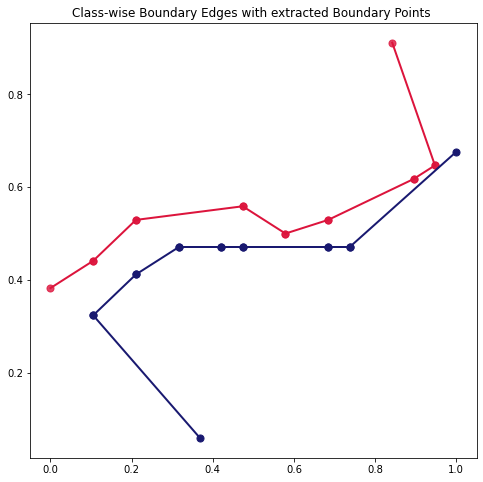

In [70]:
# this function is basically the forst stpe to triangulization where we set
# a prefernce on which boundary line to strat from based on the number of boundary 
# points it comprisies of
# It basically provides us the points that lie on the boundary from each class
# along with prefernce applied
def preference(con0,con1,boundary_region):
    fig, axs = plt.subplots(figsize=(8,8))
    axs.set_title('Class-wise Boundary Edges with extracted Boundary Points ')
    si=50
    i=0
    point_list0=[] # final point list of class 0 to iterate for triangulization
    point_list1=[] # final point list of class 1  to iterate for triangulization
    
    color =['c','y','m','b','g','pink','lime','orange']
    
    #For class 0
    #print(con0.intersects(boundary_region))
    con0inter= con0.intersection(boundary_region)
    for c in con0inter:
        
        print(c.boundary)
        print(type(c))
        if(c.geom_type == 'Polygon'):
            plt.plot(*c.exterior.coords.xy, linewidth=2.0, color ='crimson')
            xs = [point.x for point in c.boundary]
            ys = [point.y for point in c.boundary]
            plt.scatter(xs, ys, c='crimson', alpha = 0.8, s= 50)
            for b in c.boundary:
                point_list0.append((b.x,b.y))
            si=si+50
            i+=1
        else:    
            plt.plot(*c.coords.xy, linewidth=2.0, color ='crimson')
            xs = [point.x for point in c.boundary]
            ys = [point.y for point in c.boundary]
            plt.scatter(xs, ys, c='crimson', alpha = 0.8, s= 50)
            for b in c.boundary:
                point_list0.append((b.x,b.y))
            si=si+50
            i+=1
        
            
    #For class 1
    con1inter= con1.intersection(boundary_region)
    for c in con1inter:
        #print(c.boundary)
        if(c.geom_type == 'Polygon'):
            plt.plot(*c.exterior.coords.xy, linewidth=2.0, color = 'midnightblue')
        else:
            plt.plot(*c.coords.xy, linewidth=2.0, color = 'midnightblue')
            xs = [point.x for point in c.boundary]
            ys = [point.y for point in c.boundary]
            plt.scatter(xs, ys, c='midnightblue', s= 50)
            for b in c.boundary:
                point_list1.append((b.x,b.y))
    
            
    plt.savefig(path + '07_classwise_boundary_points.png')
    # Chekcking and making the list unique as line end points repaeat to form
    # line segments, set feature of python used to achieve that.
    #print(point_list1)
    #print(point_list0)
    print("Set") 
    print(len(set(point_list0)))
    print(len(set(point_list1)))
    
    
    dots0= len(set(point_list0)) # number of dots of class 0 on boundary
    dots1=len(set(point_list1))  # number of dots of class 1 on boundary
    
    # dot coordinates
    dot_list0= set(point_list0) 
    dot_list1= set(point_list1)
    
    if(dots0< dots1):
        preference= 0   
    else: 
        preference= 1
    return preference,dots0, list(dot_list0), dots1 , list(dot_list1)
        
    

   
preference,dots0, dot_list0, dots1 , dot_list1= preference(con0,con1,final_region)  




In [76]:
# This part is for finding out the crossing edges, It helps in identifying strating point for final
# boundary line construction and will be used to reject special cases as mentioned in paper. The 
# Ones labelled as corner cases, for those the number of crossing edges is always greater than 2 as 
# illustrated in paper.
def getHullBoundaryList(hull,points):
    #print(combined_hull_poly.boundary)
    con= zip(points[hull.vertices,0], points[hull.vertices,1])
    con_list = []
    for v in con:
        con_list.append(v)   
    #print(con_list) 
    return con_list
           
def getEdges(con_list):
                i = 0 
                edges=[]
                for c in con_list:
                    p1 = c 
                    if(i<len(con_list)-1 ):
                        p2 = con_list[i+1]
                        i+=1
                    else:
                        p2= con_list[0]
                    edges.append([p1,p2])
                #print(p1,p2)
                return edges
           

def checkPair(p1,p2,con0,con1): #Point(x1,y1),Point(x2,y2)
    if(p1.intersects(con0) and p2.intersects(con1) ):
        print("alpha")
        return True
    elif(p2.intersects(con0) and p1.intersects(con1)):
        print("beta")
        return True
    else:
        #print("noproblem")
        return False
        
def crossEdges(combinedhull,con0,con1):
    edge_count =0
    con_list = getHullBoundaryList(combinedhull,combined_data)
    edges = getEdges(con_list) 
    cross_edges=[]
    #print(edges)
    
    for e in edges:
        if( checkPair(Point(e[0][0], e[0][1]),Point(e[1][0], e[1][1]), con0,con1)):
            cross_edges.append(e)
            edge_count+=1
    #print(edge_count)
    return cross_edges
                

def computeLineMid(edge):
    x_mid = (edge[0][0] + edge[1][0])/2
    y_mid =  (edge[0][1] + edge[1][1])/2
    return (x_mid,y_mid )

   

def removeCrossEdges(lst):
    finalO = list(lst)
    for e in  cross_edges:
        finalO = removeFromList(removeFromList(finalO, e[0]), e[1])
        midpoints.append(computeLineMid(e))
    return finalO



alpha
beta
[(0.0, 0.38235292), (0.36842108, 0.058823526)]
[(1.0, 0.6764705), (0.84210527, 0.9117646)]
2
[(0.18421053886413574, 0.22058822214603424), (0.9210526347160339, 0.7941175699234009)]


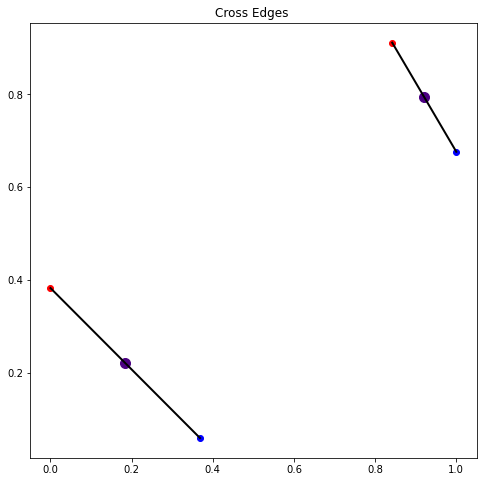

In [77]:
#eigth plot
cross_edges = crossEdges(combinedhull,con0,con1)  
fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('Cross Edges ')
i=0
color =['r', 'b', 'r']
for e in  cross_edges:
    print (e)
    plt.scatter(e[0][0],e[0][1], color = color[i],alpha = 1.0)
    plt.scatter(e[1][0],e[1][1], color = color[i+1], alpha = 1.0)
    l = LineString([(e[0][0],e[0][1]),(e[1][0],e[1][1])])
    plt.plot(*l.coords.xy, linewidth=2.0, color = "black")
    
    i+=1

plt.savefig(path + '08_cross_edges.png')

midpoints=[]

Tlist0= removeCrossEdges(dot_list0)
#Tlist1 = removeCrossEdges(dot_list1)
#print(midpoints)

i=0
for e in  midpoints:
    #print (e)
    plt.scatter(e[0],e[1], color = "indigo", s= 100)
    i+=1


print(len(midpoints))
print(midpoints)

plt.savefig(path + '08_cross_edges_midpoints.png')
plt.show() 

In [78]:
def triangulate(Tlist_pref,Tlist_nonpref,con_pref,con_npref):
    valid_edges=[]
    T1 = list(Tlist_pref)
    T2 = list(Tlist_nonpref)
    for t in list(T1):
        for tnp in list(T2):
            line = LineString([t,tnp])
            
            #print(line.intersects(con0))
            #print(line.intersection(con0))
            if(line.intersection(con0).geom_type == 'Point' and line.intersection(con1).geom_type == 'Point' ):
                #print("valid")
                plt.plot(*line.coords.xy, linewidth=2.0, color = "yellowgreen")
                valid_edges.append(line)
                T2.remove(tnp)
            else:
                #print("invalid")
                plt.plot(*line.coords.xy, linewidth=1.0, color = "black",linestyle='dashed')
                
                
            #print(line.intersects(con1))
            #print(line.intersection(con1))
    return valid_edges




In [79]:
def removeFromList(lst, tup):
    index=0
    lst2=list(lst)
    for l in lst2:
        if (l == tup):
             lst2.remove(tup)
    return lst2 
    


def orderPoints(line_start, midpoints):
    closest_ind_dist=100
    closest_ind = 0
    i=0
    if ( len(midpoints) == 0):
        return ordered_line
    else:
        for p in midpoints:
            #print("value of P: ", p)
            if p ==line_start:
                print("same point")
            else:
                dist = Point(line_start[0],line_start[1]).distance(Point(p[0],p[1]))
                #print(dist, closest_ind,i)
                if ( dist < closest_ind_dist):
                        closest_ind_dist=dist
                        closest_ind= i
            i+=1
        ordered_line.append(midpoints[closest_ind])
        new_line_start =midpoints[closest_ind]
        #print(ordered_line)
        return orderPoints(new_line_start, removeFromList(midpoints,midpoints[closest_ind]))
        
            
                
           



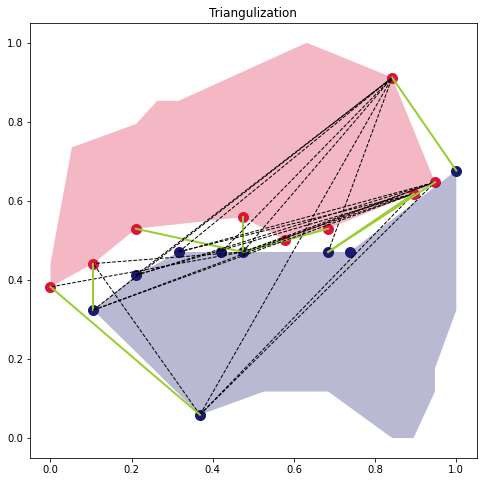

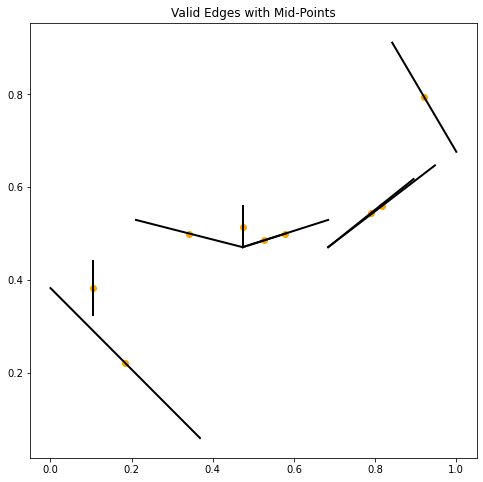

value of start:  (0.9210526347160339, 0.7941175699234009)
Ordered Line


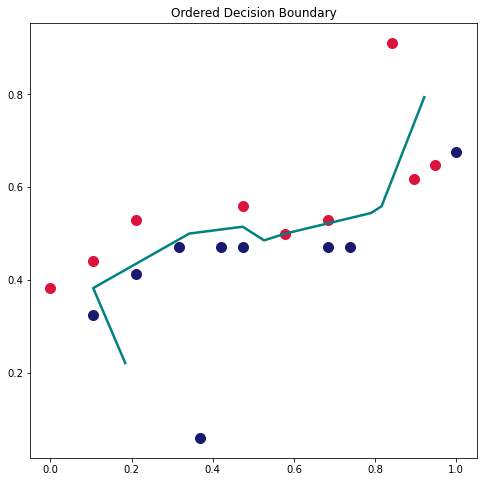

In [80]:
fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('Triangulization') 
for l in list(dot_list0):
    plt.scatter(l[0],l[1], color = "crimson", s = 100)
for l in list(dot_list1):
    plt.scatter(l[0],l[1], color = "midnightblue", s= 100)

axs.fill(*con0.exterior.coords.xy, alpha=0.3, fc='crimson', ec='none')
axs.fill(*con1.exterior.coords.xy, alpha=0.3, fc='midnightblue', ec='none')


if  (preference == 0):
  valid_edges= triangulate(dot_list0,dot_list1,con0,con1) 
elif (preference == 1):
  valid_edges = triangulate(dot_list1,dot_list0,con1,con0)
else:
    print("Np")
plt.savefig(path + '09_Triangulization.png')
plt.show() 

fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('Valid Edges with Mid-Points') 
edge_mid_points_1st =midpoints[0]
edge_mid_points_2nd =midpoints[1]
midpoints=[] # pick edge points computed earlier for starting point choice and clear
#the list of midpoints before computing for every gree line found, a valid edge resulting 
# from triangulization
#print(midpoints)


# Compute Midpoint of every valid Edge we got from triangulate()
for e in valid_edges:
    b = e.boundary
    #print([(b[0].x, b[0].y),(b[1].x, b[1].y)])
    edge = [(b[0].x, b[0].y),(b[1].x, b[1].y)]
    plt.plot(*e.coords.xy, linewidth=2.0, color = "black")
    midpoints.append(computeLineMid(edge))
i=0
#print(midpoints)
for e in  (midpoints):
    #print (e)
    #plt.scatter(e[0],e[1], color = 'orange')
    if(Point(e[0], e[1]).within(con0) or Point(e[0], e[1]).within(con1)  ):
        plt.scatter(e[0],e[1], color = 'red')
    else:
        plt.scatter(e[0],e[1], alpha = 1.0, color = 'orange')
    i+=1
plt.savefig(path + '10_Triangulization_Valid_Edges_MP.png')
plt.show() 



#print(len(valid_edges))
#print(len(set(midpoints)))



#Orderring Mid points for continuous Line segment for Decision Boundary Construction
line_start = edge_mid_points_2nd #edge_mid_points_1st
print("value of start: ", line_start)
ordered_line = [line_start]
#print("value of Ordered Line: ", ordered_line)


ordered_boundary = orderPoints(line_start, removeFromList(midpoints,line_start));
print("Ordered Line")
#print(ordered_boundary)

fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('Ordered Decision Boundary') 
decisionline = LineString(ordered_boundary)
plt.plot(*decisionline.coords.xy, linewidth=2.5, color = "teal",alpha = 0.99)
plt.savefig(path + '11_Ordered_Decision_Boundary.png')


for l in list(dot_list0):
    plt.scatter(l[0],l[1], color = "crimson", s = 100)
for l in list(dot_list1):
    plt.scatter(l[0],l[1], color = "midnightblue", s= 100)

#axs.fill(*con0.exterior.coords.xy, alpha=0.3, fc='crimson', ec='none')
#axs.fill(*con1.exterior.coords.xy, alpha=0.3, fc='midnightblue', ec='none')

plt.savefig(path + '12_Ordered_Decision_Boundary_with_Classes.png')

plt.show() 







        

    
    

    
    
        
        

    
    

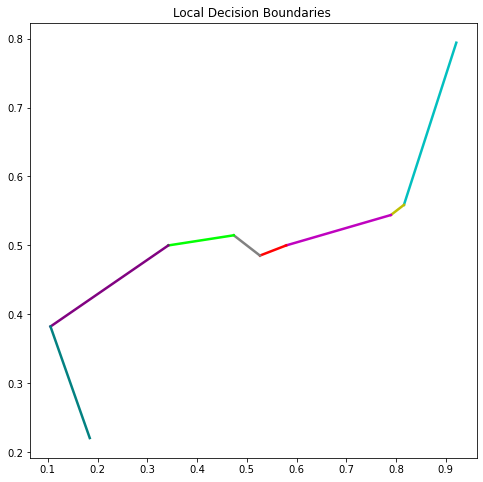

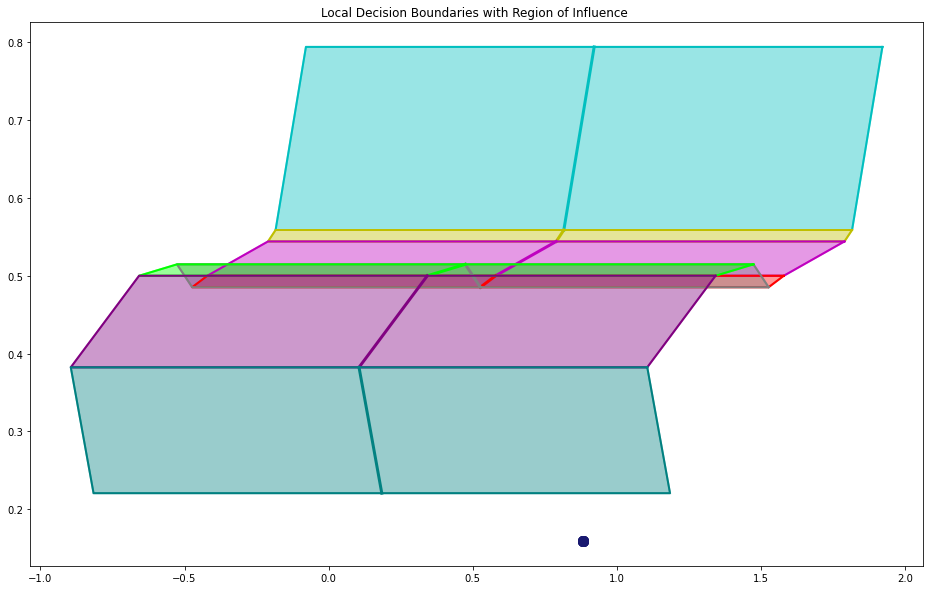

In [84]:
from shapely.geometry import  MultiLineString, mapping, shape
def getPolyBounds(line, mag):
   upper =  line.coords[0]
   lower =  line.coords[1]
   upper_x= upper[0] 
   lower_x = lower[0]
    
   upper_right =  upper_x + mag
   upper_left  = upper_x - mag
   lower_right = lower_x + mag
   lower_left = lower_x - mag
   
   polygon = Polygon([(upper_right,upper[1] ),(upper_left,upper[1]),(lower_left,lower[1] ),(lower_right,lower[1] )])
   return  polygon

def pieceWiseBoundary(line):
    final_lines = []
    X, y= line.coords.xy
    polylist=[]
   
    klist = []
    for z in zip(X,y):
        klist.append(z)
    i=0
    for z in klist:
        #print(z)
        if(i < len(klist) -1):
            final_lines.append([klist[i],klist[i+1] ])
        i+=1
    #print(final_lines)
    lines = MultiLineString(final_lines)
    colors = ['c','y','m','r','grey','lime','purple','teal','indigo']
    i=0
    fig, axs = plt.subplots(figsize=(8,8))
    axs.set_title('Local Decision Boundaries ') 
    for l in lines:
        plt.plot(*l.coords.xy, linewidth=2.5, color = colors[i],alpha = 0.99)
        i+=1
    plt.savefig(path + '14_Local_Decision_Boundaries.png')
        #dilated = l.buffer(0.1)
        #plt.plot(*dilated.exterior.coords.xy, color = colors[i],alpha = 0.5)
    i=0
    for l in lines: 
        poly = getPolyBounds(l, 1)
        polylist.append(poly)
        i+=1
    return lines, polylist
        

def printBoundarwithRegion(zipobject):
    i=0
    colors = ['c','y','m','r','grey','lime','purple','teal','indigo']
    fig, axs = plt.subplots(figsize=(16,10))
    axs.set_title('Local Decision Boundaries with Region of Influence ')
    for woo in zipobject:
        #print(woo)
        plt.scatter(0.88393086,0.15902932, color = "midnightblue", s= 100)
        plt.plot(*woo[0].coords.xy, linewidth=3, color = colors[i],alpha = 0.99)
        plt.plot(*woo[1].exterior.xy, linewidth=2.0, color = colors[i])
        plt.fill(*woo[1].exterior.xy, linewidth=2.0, color = colors[i], alpha= 0.4)
        i+=1
    plt.savefig(path + '15_Local_Decision_Boundary_zipped.png')
    

    

lines, polygons= pieceWiseBoundary(decisionline)
printBoundarwithRegion(zip(lines, polygons))


    

In [96]:
#Prediction and Testing 

# Evaluation
def isLeft(a,  b, c):
     return ((b.x - a.x)*(c.y - a.y) - (b.y - a.y)*(c.x - a.x)) > 0

In [97]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix

class Model:
    boundary_line = LineString()
    leftClass = -1
    rightClass = -1
    con0 =Polygon()
    con1 = Polygon()
    lineregions = []
    
    
    
    def markClassDirtoBoundary(self):
        bound_strt_pt = self.boundary_line.boundary[0]
        bound_end_pt= self.boundary_line.boundary[1]
        #print(isLeft(bound_strt_pt, bound_end_pt, Point(self.con0.centroid.x,self.con0.centroid.y)))
        #print(isLeft(bound_strt_pt, bound_end_pt, Point(self.con1.centroid.x,self.con1.centroid.y)))
        if(isLeft(bound_strt_pt, bound_end_pt, Point(self.con0.centroid.x,self.con0.centroid.y))):
            self.leftClass = 0 
            self.rightClass = 1
        elif (isLeft(bound_strt_pt, bound_end_pt, Point(self.con1.centroid.x,self.con1.centroid.y))): 
            self.leftClass = 1
            self.rightClass = 0
        else: print("no option")
        
    def predict(self, test_X,test_y):
        #print("predict")
        bound_strt_pt = self.boundary_line.boundary[0]
        bound_end_pt= self.boundary_line.boundary[1]
        result = [] 
        y_ind =0
        for x in test_X:
            if (isLeft(bound_strt_pt, bound_end_pt, Point(x[0],x[1]))):
                y_pred = self.leftClass 
                #print(x)
                result.append([ x,test_y[y_ind], y_pred])
                #point  = np.array([[(x[0], x[1]) , test_y[y_ind] ,y_pred ] 
                y_ind+=1 
                
            else:
                #print(x)
                y_pred = self.rightClass
                result.append([ x,test_y[y_ind], y_pred])
                y_ind+=1
            #print(isLeft(bound_strt_pt, bound_end_pt, Point(test_X[0],test_X[1])))
        return np.array(result)
    def error(self, y_true, y_pred):
        #print("error")
        correct=0
        incorrect=0
        z = zip(y_true,y_pred )
        for e in z:
            #print(e)
            if(e[0]==e[1]):
                correct+=1
            else : 
                incorrect+=1
        return   incorrect/ y_true.shape[0]
    def accuracy(self, y_true, y_pred):
        return accuracy_score(list(y_true), list(y_pred))
    def F1(self, y_true, y_pred, avg):
        return f1_score(list(y_true),list(y_pred), average=avg,zero_division=1)
    def confusionMatrix(self, y_true, y_pred):
        return confusion_matrix(list(y_true), list(y_pred))
    def CMPositivesNegatives(self, y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(list(y_true), list(y_pred)).ravel()
        return tn, fp, fn, tp
    def PlotConfusionMatrix(self, cm, name):
        fig, axs = plt.subplots(figsize=(8,6))
        ax= plt.subplot()
        sn.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
        # labels, title and ticks
        ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
        ax.set_title('Confusion Matrix - '+ name ); 
        ax.xaxis.set_ticklabels([1, 0]); ax.yaxis.set_ticklabels([1, 0]);
      
        plt.savefig(path + '16_Confusion_Matrix_'+ name + '.png')
        plt.savefig(path + '16'+name+'.png')
        #plt.show()
    def getRegionLine(self, index):
        return self.lineregions[index][0]
    def predict_point(self,test_X,test_y):
        #print("in predictpoint")
        #print(test_y)
        result = [] 
        y_ind =0
        region_index=0
        region_line= LineString()
        outflag=True
        #print(test_X)
        for x in test_X:
            region_index=0
            for z in self.lineregions:
                #print(Point(x[0],x[1]).within(z[1]))
                if (Point(x[0],x[1]).within(z[1])):
                    outflag = False
                    #print("woohoo")
                    poly_index = region_index
                    #print(region_index)
                    region_line = self.getRegionLine(region_index)
                    region_index+=1
                    #break;
            if (outflag == False ) :
                bound_strt_pt = region_line.boundary[0]
                bound_end_pt=  region_line.boundary[1]
                if (isLeft(bound_strt_pt, bound_end_pt, Point(x[0],x[1]))):
                    y_pred = self.leftClass 
                    #print(x)
                    result.append([x,test_y[y_ind], y_pred])
                    #point  = np.array([[(x[0], x[1]) , test_y[y_ind] ,y_pred ] 
                    y_ind+=1 
                else:
                    #print(x)
                    y_pred = self.rightClass
                    result.append([ x,test_y[y_ind], y_pred])
                    y_ind+=1
            else:
                #result.append([ x ,test_y[y_ind], 100])
                y_ind+=1 
                
                #print(isLeft(bound_strt_pt, bound_end_pt, Point(test_X[0],test_X[1])))
        #print(result)
        return np.array(result)
        
            



In [98]:
#print(X_test)
#print(y_test)
#np.concatenate(X_test,y_test)
def inputFormat(X_test, y_test):
    inputdata = []
    for xt in zip(X_test, y_test):
        inputdata.append([[xt[0][0],xt[0][1] ], xt[1]])
    #print([[xt[0][0],xt[0][1] ], xt[1] ])
    return np.array(inputdata)

def spliScoreData(nparray):
    data_points = nparray[:,0]
    y_true = nparray[:,1]
    y_pred = nparray[:,2]
    return data_points, y_true, y_pred






In [99]:
testdata = pd.DataFrame(data=np.c_[X_test,y_test] , columns= input_cols)
testdatainput = testdata[input_cols]
test_data = normalize(testdatainput,model_columns, target_col )
X_testnorm = test_data[model_columns].to_numpy()
y_testnorm=test_data[target_col].to_numpy()

test = inputFormat(X_testnorm,y_testnorm)




traindata = pd.DataFrame(data=np.c_[X_train,y_train] , columns= input_cols)
traindatainput = traindata [input_cols]
train_data = normalize(traindatainput,model_columns, target_col )
X_trainnorm = train_data[model_columns].to_numpy()
y_trainnorm=train_data[target_col].to_numpy()

test = inputFormat(X_testnorm,y_testnorm)
train = inputFormat(X_trainnorm,y_trainnorm)
print(test.shape)
print(train.shape)

Index(['feat_A', 'feat_B', 'target'], dtype='object')
Index(['feat_A', 'feat_B'], dtype='object')
Input head norm:      feat_A    feat_B
0  0.210526  0.535714
1  0.263158  0.714286
2  0.105263  0.535714
3  0.842105  0.642857
4  0.473684  0.500000
Result head norm:      feat_A    feat_B  target
0  0.210526  0.535714     0.0
1  0.263158  0.714286     0.0
2  0.105263  0.535714     0.0
3  0.842105  0.642857     0.0
4  0.473684  0.500000     0.0
Index(['feat_A', 'feat_B', 'target'], dtype='object')
Index(['feat_A', 'feat_B'], dtype='object')
Input head norm:      feat_A    feat_B
0  0.315789  0.235294
1  0.736842  0.735294
2  0.315789  0.235294
3  0.736842  0.235294
4  0.000000  0.382353
Result head norm:      feat_A    feat_B  target
0  0.315789  0.235294     1.0
1  0.736842  0.735294     0.0
2  0.315789  0.235294     1.0
3  0.736842  0.235294     1.0
4  0.000000  0.382353     0.0
(30, 2)
(70, 2)


In [100]:
#####   Save the Model ######

m = Model()
#print(m.leftClass,m.rightClass,m.boundary_line)
m.boundary_line = decisionline 
m.con0=con0
m.con1=con1 
m.lineregions = list(zip(lines, polygons)) # piece wise line segments of decisoin boundary
#printBoundarwithRegion(m.lineregions)
#print(m.lineregions[0][0])
m.markClassDirtoBoundary()  # mark left and right class
#print(m.leftClass,m.rightClass)



 True Error

0.26666666666666666

 Accuracy 

0.7333333333333333

 F1 - Score Macro 

0.7129186602870814

 F1 - Score Weighted 

0.7180223285486443

 F1 - Score Micro 

0.7333333333333333

 Confusion Matrix 

[[15  1]
 [ 7  7]]

TN, FP, TN, TP

(15, 1, 7, 7)


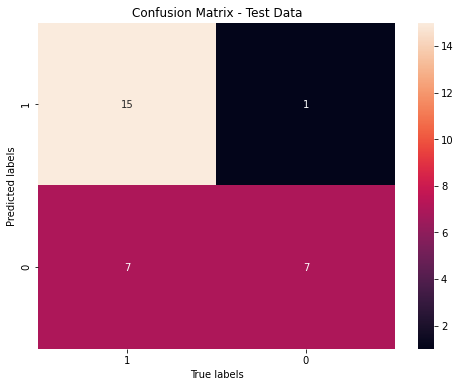

In [101]:




######  #Scoring: Predciton on Test Data ########

    

#score_result = m.predict(point[:,0], point[:,1])
#score_result = m.predict_point(point[:,0], point[:,1])


#print("score result")
#print(score_result)
#data_points, y_true, y_pred = spliScoreData(score_result)
#print ( y_true, y_pred)

#print(m.error( y_true,  y_pred))
#print(m.accuracy( y_true,  y_pred))
#print(m.F1(y_true, y_pred, 'macro')) #'micro'
#print(m.F1(y_true, y_pred, 'weighted'))
#print(m.confusionMatrix(y_true, y_pred)) 
#print(m.CMPositivesNegatives(y_true, y_pred))
#m.PlotConfusionMatrix(m.confusionMatrix(y_true, y_pred), 'Point Data')



    



#score_result = m.predict(test[:,0], test[:,1])
score_result = m.predict_point(test[:,0], test[:,1])
#print(score_result)
data_points, y_true, y_pred = spliScoreData(score_result)

#print ( y_true, y_pred)

print("\n True Error\n")
print(m.error( y_true,  y_pred))

print("\n Accuracy \n")
print(m.accuracy( y_true,  y_pred))

print("\n F1 - Score Macro \n")
print(m.F1(y_true, y_pred, 'macro')) 

print("\n F1 - Score Weighted \n")
print(m.F1(y_true, y_pred, 'weighted'))

print("\n F1 - Score Micro \n")
print(m.F1(y_true, y_pred, 'micro'))

print("\n Confusion Matrix \n")
print(m.confusionMatrix(y_true, y_pred)) 
print("\nTN, FP, TN, TP\n")
print(m.CMPositivesNegatives(y_true, y_pred))


m.PlotConfusionMatrix(m.confusionMatrix(y_true, y_pred), 'Test Data')


metric_results = [m.error( y_true,  y_pred),
                  m.accuracy( y_true,  y_pred) ,
                  m.F1(y_true, y_pred, 'macro'),
                  m.F1(y_true, y_pred, 'weighted'),
                  m.F1(y_true, y_pred, 'micro'),
                  m.confusionMatrix(y_true, y_pred),
                 m.CMPositivesNegatives(y_true, y_pred) 
                 ]


#print(metric_results )

#following order of results in metric files
#df_head = [ 'true_error', 'accuracy', 'f1_macro', 'f1_weighted','f1_micro', 'cm', 'tptn' ]
#, columns= df_head
df = pd.DataFrame( metric_results)

df.to_csv("metrics/linear/results_linear_test.csv", header = False)








 True Error

0.37142857142857144

 Accuracy 

0.6285714285714286

 F1 - Score Macro 

0.6173254835996637

 F1 - Score Weighted 

0.6098281869518203

 F1 - Score Micro 

0.6285714285714286

 Confusion Matrix 

[[28  3]
 [23 16]]

TN, FP, TN, TP

(28, 3, 23, 16)


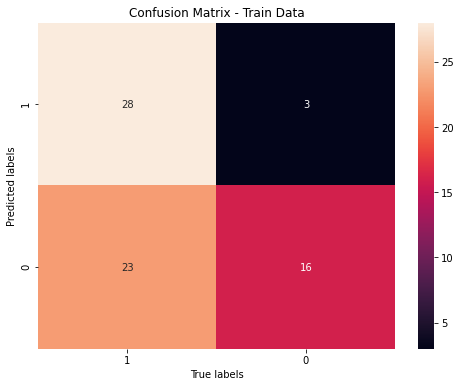

In [102]:

#score_result = m.predict(test[:,0], test[:,1])
score_result = m.predict_point(train[:,0], train[:,1])
#print(score_result)
data_points, y_true, y_pred = spliScoreData(score_result)

#print ( y_true, y_pred)

print("\n True Error\n")
print(m.error( y_true,  y_pred))

print("\n Accuracy \n")
print(m.accuracy( y_true,  y_pred))

print("\n F1 - Score Macro \n")
print(m.F1(y_true, y_pred, 'macro')) 

print("\n F1 - Score Weighted \n")
print(m.F1(y_true, y_pred, 'weighted'))

print("\n F1 - Score Micro \n")
print(m.F1(y_true, y_pred, 'micro'))

print("\n Confusion Matrix \n")
print(m.confusionMatrix(y_true, y_pred)) 
print("\nTN, FP, TN, TP\n")
print(m.CMPositivesNegatives(y_true, y_pred))


m.PlotConfusionMatrix(m.confusionMatrix(y_true, y_pred), 'Train Data')


metric_results_train = [m.error( y_true,  y_pred),
                  m.accuracy( y_true,  y_pred) ,
                  m.F1(y_true, y_pred, 'macro'),
                  m.F1(y_true, y_pred, 'weighted'),
                  m.F1(y_true, y_pred, 'micro'),
                  m.confusionMatrix(y_true, y_pred),
                 m.CMPositivesNegatives(y_true, y_pred) 
                 ]


#print(metric_results )

#following order of results in metric files
#df_head = [ 'true_error', 'accuracy', 'f1_macro', 'f1_weighted','f1_micro', 'cm', 'tptn' ]
#, columns= df_head
df = pd.DataFrame( metric_results_train)

df.to_csv("metrics/linear/results_linear_train.csv", header = False)



In [ ]:
########### Program Ends here ########
#Remove extras below carefully
# Below Code in between logic during code developemnt, No usage in final version, can be excluded

In [378]:
def extended_lines(con0, factor):
    extend_yline0= LineString([(con0.centroid.x, factor), (con0.centroid.x, -factor) ]) # require normalized input
    extend_xline0 = LineString([(factor, con0.centroid.y), (-factor, con0.centroid.y) ]) # require normalized input
    return extend_xline0,  extend_yline0
    
def line_intersects(x_line, y_line, box):
   return  x_line.intersects(box), y_line.intersects(box)

def get_box_intersects(x_line, y_line, box):
   return  x_line.intersects(box), y_line.intersects(box)


def line_intersection(x_line, y_line, box):
    return x_line.intersection(box), y_line.intersection(box)

In [ ]:
def find_region(con0, con1, box):
    print("find_region")
    center0 = [con0.centroid.x,con0.centroid.y] 
    center1 = [con1.centroid.x,con1.centroid.y]
    #print(getDirection(center0, center1))
    extend_xline0, extend_yline0= extended_lines(con0, 3)
    extend_xline1, extend_yline1= extended_lines(con1, 3)
    #print(line_intersects(extend_xline0, extend_yline0, box))
    
    bx_0,by_0=line_intersection(extend_xline0, extend_yline0, box)
    bx_1,by_1=line_intersection(extend_xline1, extend_yline1, box)
    print(bx_0)
    fig, axs = plt.subplots() 
    #plt.plot(*bx_0.coords.xy, linewidth=2.0, color = "black")
    #plt.scatter(*bx_0.coords.xy, color = "black")
    #plt.plot(*by_0.coords.xy, linewidth=2.0, color = "blue")
    #plt.scatter(*by_0.coords.xy, color = "blue")
    
    #plt.plot(*bx_1.coords.xy, linewidth=2.0, color = "black")
    plt.scatter(*bx_1.coords.xy, color = "black")
    plt.plot(*by_1.coords.xy, linewidth=2.0, color = "blue")
    plt.scatter(*by_1.coords.xy, color = "blue")
    

    x0,y0 = line_intersection(bx_0, by_0, box)
    x1,y1 = line_intersection(bx_1, by_1, box)
    
    firstx0,lastx0 = x0.boundary
    firstx1,lastx1 = x1.boundary
    firsty0,lasty0 = y0.boundary
    firsty1,lasty1 = y1.boundary
    
    y_box = Polygon([firsty0, firsty1,lasty1 , lasty0 ])
    x_box = Polygon([firstx0, firstx1,lastx1 , lastx0 ])
    axs.fill(*x_box.exterior.coords.xy, alpha=0.4, fc='yellow', ec='none')
    axs.fill(*y_box.exterior.coords.xy, alpha=0.4, fc='pink', ec='none')
    return x_box, y_box

In [ ]:

#extend_xline0, extend_yline0= extended_lines(con0, 3)
#plt.plot(*extend_yline0.coords.xy, linewidth=2.0, color = "black")
#plt.plot(*extend_xline0.coords.xy, linewidth=2.0, color = "black")

#extend_xline1, extend_yline1= extended_lines(con1, 3)
#plt.plot(*extend_yline1.coords.xy, linewidth=2.0, color = "black")
#plt.plot(*extend_xline1.coords.xy, linewidth=2.0, color = "black")

    
#print(line_intersects(extend_xline0, extend_yline0, box))
#print(line_intersects(extend_xline1, extend_yline1, box))


In [173]:

def ignore_points(con0,con1,points0,points1):
    count_true_1 = []
    count_true_0 = []
    foreign_point_list_1 = []
    foreign_point_list_0 = []
    ind1=0
    ind0=0
    for p in points0:
        #print(Point([p[0],p[1]]).within(con1))
        
        if (Point([p[0],p[1]]).within(con1)):
            print()
            count_true_1.append(ind0)
            foreign_point_list_1.append((p[0],p[1]))
        ind0+=1
    for p1 in points1:
        #print(Point([p[0],p[1]]).within(con0))
        if (Point([p1[0],p1[1]]).within(con0)):
            count_true_0.append(ind1)
            foreign_point_list_0.append((p1[0],p1[1]))
        ind1+=1
    #print(count_true_1,count_true_0)
    print("####################")
    #print(foreign_point_list_0 )
    print("####################")
    #print( foreign_point_list_1 )
    return count_true_1 ,foreign_point_list_1, count_true_0,foreign_point_list_0

rem_0,fr0, rem_1,fr1 = ignore_points(con0,con1,points0,points1)
print(rem_0,rem_1)

print(fr0)
print("####################")
print(fr1)

    





####################
####################
[7, 21, 22, 23] [0, 7, 10, 27]
[(-0.2630602821327246, -0.5358031422717471), (-0.1499882762042679, -0.27981559898226144), (0.1885422238568443, -0.28764236244973457), (0.28683827209152185, 1.229667432764909)]
####################
[(-0.3090954878179035, -0.5547083786115498), (-0.1740497925481488, 1.0890043460870786), (0.19666806808383702, 1.2374807092250109), (-0.18923022995172828, -0.18294700725230337)]


In [57]:
import matplotlib.pyplot as plt

def shrink_polygon():
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    def line_intersection(line1, line2):
        xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

        div = det(xdiff, ydiff)
        if div == 0:
            raise Exception('lines do not intersect')
        d = (det(*line1), det(*line2))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return x, y
    # how much the coordinates are moved as an absolute value
    shrink_value_x = 0.5
    shrink_value_y = 0.5
    # coords must be clockwise
    pointtt= list(con0.exterior.coords)
    reversed_list = pointtt[::-1]
    print(reversed_list)
    reversed_list.pop()
    coords = reversed_list #[(0, 0), (0, 100), (20, 100), (30, 60), (40, 100), (60, 100), (60, 0), (40, 10), (40, 40), (20, 40), (20, 10)]
    lines = [[coords[i-1], coords[i]] for i in range(len(coords))]
    print(coords)
    print("helloooo")
    print(lines)
    new_lines = []
    for i in lines:
        dx = i[1][0] - i[0][0]
        dy = i[1][1] - i[0][1]

    # this is to take into account slopes
        print(dx)
        print((dx*dx + dy*dy))
        factor = 1 / (dx*dx + dy*dy)**0.5
        new_dx = dy*shrink_value_x * factor
        new_dy = dx*shrink_value_y * factor
        new_lines.append([(i[0][0] + new_dx, i[0][1] - new_dy),
                      (i[1][0] + new_dx, i[1][1] - new_dy)])
        # find position of intersection of all the lines
    fig, axs = plt.subplots() 
    new_coords = []
    for i in range(len(new_lines)):
        new_coords.append((line_intersection(new_lines[i-1], new_lines[i])))
    poly= Polygon(new_coords)
    org_poly= Polygon(coords)
    axs.plot(*poly.exterior.coords.xy, alpha=0.4, color="blue", lw=2)
    axs.fill(*poly.exterior.coords.xy, alpha=0.4, fc='blue', ec='none')

    axs.plot(*org_poly.exterior.coords.xy, alpha=0.4, color="green", lw=2)
    axs.fill(*org_poly.exterior.coords.xy, alpha=0.4, fc='green', ec='none')


In [269]:
def getDirection(c1,c2):
    direction_x = c2[0]-c1[0]
    direction_y= c2[1]-c1[1]    
    print( direction_x ,  direction_y, c1[0], c1[1])
    if ((c1[0]== c2[0]) and (c1[1] == c2[1])):
        return "equal"
    else:
        if(direction_y > c1[1] and direction_x > c1[0] ):
            return "right_up"
        elif ((direction_x > c1[0]) and direction_y < c1[1] ):
            return "right_down"
        elif (direction_x<c1[0] and direction_y>c1[1] ):
            return  "left_up"    
        elif ( direction_x<c1[0] and direction_y<c1[1] ):
            return "left_down"
        elif ( direction_x < c1[0] and direction_y== 0 ):
            return "left"
        elif ( direction_x > c1[0] and direction_y== 0 ):
            return "right"
        elif( direction_y<c1[1] and direction_x == 0):
            return "down"
        elif ( direction_y > c1[1] and direction_x == 0 ):
            return "up"
        else:
            print(direction_x, direction_y < c1[1] )
            return "no option"
        

In [270]:
print(getDirection([0,0],[1,0]))
print(getDirection([0,0],[-1,0]))
print(getDirection([2,3],[2,3]))
print(getDirection([0,0],[0,-1]))
print(getDirection([0,0],[0,1]))
print(getDirection([0,1],[2,3]))
print(getDirection([0,1],[2,-3]))
print(getDirection([0,1],[-1,-3]))
print(getDirection([0,1],[-1,3]))

1 0 0 0
right
-1 0 0 0
left
0 0 2 3
equal
0 -1 0 0
down
0 1 0 0
up
2 2 0 1
right_up
2 -4 0 1
right_down
-1 -4 0 1
left_down
-1 2 0 1
left_up


In [163]:
import matplotlib.pyplot as plt

def shrink_polygon(con0):

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    def line_intersection(line1, line2):
        xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

        div = det(xdiff, ydiff)
        if div == 0:
           raise Exception('lines do not intersect')

        d = (det(*line1), det(*line2))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return x, y

    # how much the coordinates are moved as an absolute value
    shrink_value_x = 0.10
    shrink_value_y = 0.10

    # coords must be clockwise
    pointtt= list(con0.exterior.coords)
    reversed_list = pointtt[::-1]
    #print(reversed_list)
    reversed_list.pop()
    coords = reversed_list #[(0, 0), (0, 100), (20, 100), (30, 60), (40, 100), (60, 100), (60, 0), (40, 10), (40, 40), (20, 40), (20, 10)]
    lines = [[coords[i-1], coords[i]] for i in range(len(coords))]
    #print(coords)
    #print("helloooo")
    #print(lines)

    new_lines = []
    for i in lines:
        #print(i)
        dx = i[1][0] - i[0][0]
        dy = i[1][1] - i[0][1]

    # this is to take into account slopes
        #print(dx)
        #print((dx*dx + dy*dy))
        factor = 1 / (dx*dx + dy*dy)**0.5
        new_dx = dy*-shrink_value_x * factor
        new_dy = dx*-shrink_value_y * factor

        new_lines.append([(i[0][0] + new_dx, i[0][1] - new_dy),
                      (i[1][0] + new_dx, i[1][1] - new_dy)])

    # find position of intersection of all the lines
    fig, axs = plt.subplots() 
    new_coords = []
    for i in range(len(new_lines)):
        new_coords.append((line_intersection(new_lines[i-1], new_lines[i])))

    poly= Polygon(new_coords)
    org_poly= Polygon(coords)
    axs.plot(*poly.exterior.coords.xy, alpha=0.4, color="blue", lw=2)
    axs.fill(*poly.exterior.coords.xy, alpha=0.4, fc='blue', ec='none')

    axs.plot(*org_poly.exterior.coords.xy, alpha=0.4, color="green", lw=2)
    axs.fill(*org_poly.exterior.coords.xy, alpha=0.4, fc='green', ec='none')
    axs.scatter(*org_poly.exterior.coords.xy, alpha=0.4, color="green", lw=2)
    return  poly


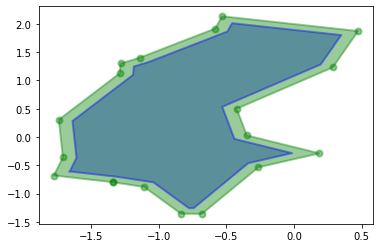

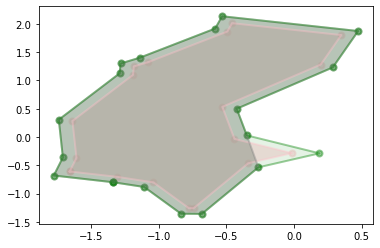

In [164]:
shrunk = shrink_polygon(con0)
fig, axs = plt.subplots() 
axs.plot(*shrunk.exterior.coords.xy, alpha=0.4, color="pink", lw=2)
axs.fill(*shrunk.exterior.coords.xy, alpha=0.4, fc='pink', ec='none')
axs.scatter(*shrunk.exterior.coords.xy, alpha=0.4, color="pink", lw=2)
axs.plot(*polychk.exterior.coords.xy, alpha=0.4, color="grey", lw=2)
axs.fill(*polychk.exterior.coords.xy, alpha=0.4, fc="grey", ec='none')
axs.scatter(*polychk.exterior.coords.xy, alpha=0.4, color="grey", lw=2)

axs.plot(*org_poly.exterior.coords.xy, alpha=0.4, color="green", lw=2)
axs.fill(*org_poly.exterior.coords.xy, alpha=0.1, fc='green', ec='none')
axs.scatter(*org_poly.exterior.coords.xy, alpha=0.4, color="green", lw=2)



TopologyException: Input geom 1 is invalid: Self-intersection at or near point -1.3580000000000001 -1.3580000000000001 at -1.3580000000000001 -1.3580000000000001


####################
[(-0.799, -0.799), (-0.68, -0.68), (-0.361, -0.361), (0.307, 0.307), (1.126, 1.126), (1.3, 1.3), (1.402, 1.402), (1.917, 1.917), (2.134, 2.134), (1.873, 1.873), (1.23, 1.23), (0.5, 0.5), (0.029, 0.029), (-0.288, -0.288), (-1.358, -1.358), (-1.355, -1.355), (-0.883, -0.883), (-0.799, -0.799)]
(array('d', [-0.799, -0.68, -0.361, 0.307, 1.126, 1.3, 1.402, 1.917, 2.134, 1.873, 1.23, 0.5, 0.029, -0.288, -1.358, -1.355, -0.883, -0.799]), array('d', [-0.799, -0.68, -0.361, 0.307, 1.126, 1.3, 1.402, 1.917, 2.134, 1.873, 1.23, 0.5, 0.029, -0.288, -1.358, -1.355, -0.883, -0.799]))
<class 'shapely.geometry.polygon.Polygon'> <class 'shapely.geometry.polygon.Polygon'>
True


TopologicalError: The operation 'GEOSDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x00000199DDB9CD30>

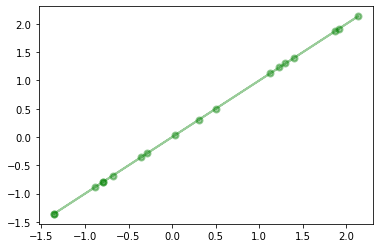

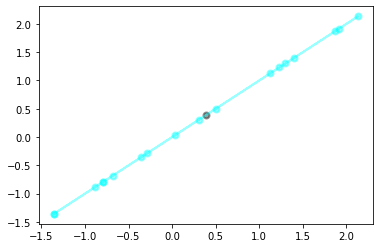

In [249]:
lst = [(1,2),(0,0)]
#lst2 = removeFromList(list(con0.exterior.coords), (0.1885422238568443, -0.28764236244973457))
#print(list(con0.exterior.coords))
#print(lst2)

fig, axs = plt.subplots() 
polychk = Polygon(lst2)
axs.plot(*polychk.exterior.coords.xy, alpha=0.4, color="green", lw=2)
axs.fill(*polychk.exterior.coords.xy, alpha=0.4, fc='green', ec='none')
axs.scatter(*polychk.exterior.coords.xy, alpha=0.4, color="green", lw=2)

#newinter = polychk.union(shrunk.difference(polychk)) 
#axs.plot(*newinter.exterior.coords.xy, alpha=0.4, color="purple", lw=2)
#axs.fill(*newinter.exterior.coords.xy, alpha=0.4, fc="purple", ec='none')
#axs.scatter(*newinter.exterior.coords.xy, alpha=0.4, color="purple", lw=2)

print("####################")
lst2= list(con0.exterior.coords)
for f in fr0:
    lst2 = removeFromList(lst2,f)
fig, axs = plt.subplots() 

print(lst2)

polychk = Polygon(lst2)
print(polychk.exterior.coords.xy)
axs.plot(*polychk.exterior.coords.xy, alpha=0.4, color="aqua", lw=2)
axs.fill(*polychk.exterior.coords.xy, alpha=0.4, fc='aqua', ec='none')
axs.scatter(*polychk.exterior.coords.xy, alpha=0.4, color="aqua", lw=2)
axs.scatter(*polychk.centroid.coords.xy, alpha=0.4, color="black", lw=2)
print(type(p),type(polychk))
print(polychk.intersects(shrunk))
newinter = shrunk.difference(polychk) 

x,y=polychk.centroid.coords.xy
print("oooo")

#print(x,y)


if newinter.geom_type == 'MultiPolygon':
    for p in newinter: 
        #xline0, yline0= extended_lines(p, 0.5)
        v,w =p.centroid.coords.xy
        line1 = LineString([(x[0],y[0]),(v[0],w[0])] )
        #plt.plot(*line1.coords.xy, linewidth=2.0, color = "black")
        print(type(p),type(polychk))
        print(line1.intersects(p))
        jj = line1.intersection(p)
        print(jj)
        plt.plot(*jj.coords.xy, linewidth=2.0, color = "black")
        jo = line1.intersection(polychk)
        print(jo)
        plt.plot(*jo.coords.xy, linewidth=2.0, color = "blue")
        hello= p.union(line1)
        print(type(hello),type(polychk))
        
        
        
    
    for p in newinter:
        axs.scatter(*p.centroid.coords.xy, alpha=0.4, color="black", lw=2)
        axs.plot(*p.exterior.coords.xy, alpha=0.4, color="purple", lw=2)
        axs.fill(*p.exterior.coords.xy, alpha=0.4, fc="purple", ec='none')
        axs.scatter(*p.exterior.coords.xy, alpha=0.4, color="purple", lw=2)
        
elif  newinter.geom_type == 'Polygon':
        axs.plot(*p.exterior.coords.xy, alpha=0.4, color="purple", lw=2)
        axs.fill(*p.exterior.coords.xy, alpha=0.4, fc="purple", ec='none')
        axs.scatter(*p.exterior.coords.xy, alpha=0.4, color="purple", lw=2)


    



    
#print(fr0)
#
#print(fr1)









[(0.9966754130627056, 0.00652771758055809), (1.0, 0.5785310644630703), (0.6484729839564378, 0.9289529757299708), (0.35863066604737504, 1.0), (0.14219924152724284, 0.7733121181601346), (0.010653220800652119, 0.5037482069090592), (0.0, 0.23577389853025954), (0.271005967144439, 0.05240259407541298), (0.5859813114570896, 0.013678384147906897), (0.8001587674647628, 0.0)]
get edges
[[(0.9966754130627056, 0.00652771758055809), (1.0, 0.5785310644630703)], [(1.0, 0.5785310644630703), (0.6484729839564378, 0.9289529757299708)], [(0.6484729839564378, 0.9289529757299708), (0.35863066604737504, 1.0)], [(0.35863066604737504, 1.0), (0.14219924152724284, 0.7733121181601346)], [(0.14219924152724284, 0.7733121181601346), (0.010653220800652119, 0.5037482069090592)], [(0.010653220800652119, 0.5037482069090592), (0.0, 0.23577389853025954)], [(0.0, 0.23577389853025954), (0.271005967144439, 0.05240259407541298)], [(0.271005967144439, 0.05240259407541298), (0.5859813114570896, 0.013678384147906897)], [(0.58598